# Project summary

## Background & Objectives
A telecommunications operator offers landline communication and internet services to its clients. They are interested in forecasting churn among their clients.

The goal is to identify potential churners and take proactive measures to retain them by analyzing their personal data, contract details, and service usage patterns.

## Data Description:
The data consists of four files obtained from different sources:

* **contract.csv**: Contains information about contracts, including contract type (monthly, 1-year, or 2-year), payment method, and electronic invoice status.
* **personal.csv**: Includes the client's personal data such as age, gender, and address.
* **internet.csv:** Provides details about internet services, including the type of connection (DSL or fiber optic) and additional services like antivirus software and cloud storage.
* **phone.csv**: Contains information about telephone services, including the number of lines and additional services like technical support and TV streaming.
* Each file contains a column named **customerID**, which serves as a unique identifier for each client

## Steps to Take

1. **Data Loading:** Load the provided CSV files into pandas DataFrames (contract.csv, personal.csv, internet.csv, phone.csv)
2. **Data Exploration:** Explore the data to understand its structure, features, and any missing values or anomalies
3. **Data Preparation:** Preprocess the data by handling missing values, encoding categorical variables, and performing any necessary transformations
4. **Feature Engineering:** Create new features or extract relevant information from existing ones that could help improve the predictive model
5. **Data Integration:** Merge the DataFrames based on similar unique feature (customerID) column to create a single dataset containing all relevant information
6. **Churn Prediction Model:** Choose an appropriate machine learning algorithm (e.g., logistic regression, random forest, gradient boosting) and train a predictive model to forecast churn based on the integrated dataset
7. **Model Evaluation:** Evaluate the performance of the trained model using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC AUC)

# Data loading (from scratch)

## Import required plugin/library

In [ ]:
from google.colab import files
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

## Create new folder "assignment"

In [ ]:
!dir
!mkdir datasets

sample_data


## Upload assignment file

In [ ]:
# Prompt user to upload a folder
uploaded = files.upload()

# move final_provider.zip to 'datasets/' folder
!mv final_provider.zip datasets/

## Unzip & dataframe preparation

In [ ]:
!unzip "datasets/final_provider.zip" -d "datasets/"
!dir datasets/final_provider/

In [ ]:
folder = os.listdir('datasets/final_provider/')
fname = [fname for fname in folder]
fname_stripped = [re.match(r'^\w+', fname)[0] for fname in fname]
fname_stripped

In [ ]:
for name in fname_stripped:
  exec(f"df_{name} = pd.read_csv('datasets/final_provider/{name}.csv')")

# Data understanding
* What are the main features available in each dataset (contract, personal, internet, phone)?
* How many unique customers are there in each dataset?
* Are there any common fields or keys that can be used to merge the datasets?

In [ ]:
print(f'Main features in personal dataset are: {df_personal.columns.to_list()}')
print(f'Main features in phone dataset are: {df_phone.columns.to_list()}')
print(f'Main features in internet dataset are: {df_internet.columns.to_list()}')
print(f'Main features in contract dataset are: {df_contract.columns.to_list()}')

Main features in personal dataset are: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
Main features in phone dataset are: ['customerID', 'MultipleLines']
Main features in internet dataset are: ['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Main features in contract dataset are: ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
print(f'There are {df_personal["customerID"].nunique()} unique customers in personal dataset')
print(f'There are {df_phone["customerID"].nunique()} unique customers in phone dataset')
print(f'There are {df_internet["customerID"].nunique()} unique customers in internet dataset')
print(f'There are {df_contract["customerID"].nunique()} unique customers in contract dataset')

There are 7043 unique customers in personal dataset
There are 6361 unique customers in phone dataset
There are 5517 unique customers in internet dataset
There are 7043 unique customers in contract dataset


*   Common feature from above datasets is **customerID**
*   CustomerID is unique. Every client has unique customerID and contract
* Each client may have either phone, internet, or both contract type



# Data exploration (EDA)

In [ ]:
# dataframe overview

# df_personal.head(3)
# df_personal.info()
# df_personal.describe()

# df_contract.head(3)
# df_contract.info()
# df_contract.describe()

# df_internet.head(3)
# df_internet.info()
# df_internet.describe()

df_contract.head(3)
df_contract.info()
df_contract.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


* What is the distribution of contract types (monthly, 1-year, 2-year) among Interconnect's clients?
* What are the demographics of Interconnect's clients (e.g., age, gender)?
* How many customers are using each type of internet service (DSL, fiber optic)?

**Insights (Client number distribution):**
* The ratio of senior to non-senior citizens is 1:6.
* The number of female and male clients is roughly the same.
* The most common contract type is month-to-month, followed by two-year and one-year contract types. The month-to-month type is more than 2 times that of the two-year/one-year contract types.
* There are more clients who have fiber optic service than those who have DSL (3 : 2.5).
* Note: A senior citizen is an older adult, especially one who is age 65 or older.

# Merging datasets

* In the Data Understanding chapter, it is known that each dataset is linked with one special column ('customerID').
* The author finds it far more efficient to merge the datasets first and then handle/clean the data, leveraging the information already known.

In [ ]:
#merge all datasets
df_contract_personal = pd.merge(df_contract, df_personal, how='inner', on='customerID')
df_combined_internet = pd.merge(df_contract_personal, df_internet, how='left', on='customerID')
df_combined_complete = pd.merge(df_combined_internet, df_phone, how='left', on='customerID')

#make a dataframe copy
df = df_combined_complete.copy()
df.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No


# Data preparation/cleaning

## Handling data type format, missing values, etc

In [ ]:
# data info before cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


- **BeginDate** should be datetime type
- **Type** and **Gender** features should be categorical
- **TotalCharges** should be float type
- **Other features such as PaperlessBilling, Internet Services, etc** will be converted to categorical (binary of 1 and 2). Categorical type can make the computation more efficient
- **EndDate** will be converted into other features (features engineering) and will be discussed in next sub-chapter



In [ ]:
# Check category uniqueness amounts in each categorical features
df[['Type', 'PaperlessBilling',
       'PaymentMethod', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines']].nunique()

Type                3
PaperlessBilling    2
PaymentMethod       4
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
InternetService     2
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
MultipleLines       2
dtype: int64

### BeginDate, Type, and PaperlessBilling features

In [ ]:
# Function to convert data to datetime format
def convert_to_datetime(dataframe, column_list):
    for column in column_list:
      dataframe[column] = pd.to_datetime(dataframe[column])

# Function to convert data to category format
def convert_to_category(dataframe, column_list):
    for column in column_list:
      dataframe[column] = dataframe[column].astype('category')

# Convert the formating
list_datetime = ['BeginDate']
list_category = ['Type','PaymentMethod']
convert_to_datetime(df, list_datetime)
convert_to_category(df, list_category)

### TotalCharges feature

* There are 11 rows data that have empty strings ("") in TotalCharges feature
* Rows that have empty strings will be deleted

In [ ]:
df['TotalCharges'] = df['TotalCharges'].str.strip()
df[df['TotalCharges'].eq(" ")].sum()
df[df['TotalCharges'].eq(" ")].head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines


In [ ]:
# Drop empty string label, while the amount is below 5% of total rows
df = df.drop(df[df['TotalCharges'].eq("")].index)

# Convert TotalCharges to float format
df['TotalCharges'] = df['TotalCharges'].astype('float')

### Other categorical features

In [ ]:
#Function to change binary option 'Yes/No' to numerical 1/0
def convert_to_category(dataframe, column_list):
    for column in column_list:
      dataframe[column] = dataframe[column].apply(lambda x: 1 if x == 'Yes' else 0)
      dataframe[column] = dataframe[column].astype('category')

list_category = ['PaperlessBilling', 'Partner', 'Dependents',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines']
convert_to_category(df, list_category)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   category      
 4   PaperlessBilling  7032 non-null   category      
 5   PaymentMethod     7032 non-null   category      
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   category      
 11  Dependents        7032 non-null   category      
 12  InternetService   5512 non-null   object        
 13  OnlineSecurity    7032 non-null   category      
 14  OnlineBackup      7032 n

## Handling duplicate values

Duplicated value is not found

In [ ]:
# checking duplicate values
df.duplicated().sum()

0

In [ ]:
df.EndDate

0                        No
1                        No
2       2019-12-01 00:00:00
3                        No
4       2019-11-01 00:00:00
               ...         
7038                     No
7039                     No
7040                     No
7041    2019-11-01 00:00:00
7042                     No
Name: EndDate, Length: 7032, dtype: object

### Feature engineering

* New feature **ContractDuration** and **Churn** will be added
* ContractDuration is the duration contract:
  * If EndDate is 'No', ContractDuration will be (BeginDate-Today)
  * Else, ContractDuration will be (BeginDate-EndDate)
* Churn feature will be set as Target for next Modelling Chapter
  * If EndDate is 'No', Churn will be 0
  * If EndDate has value, Churn will be 1

In [ ]:
today = pd.Timestamp.now()
df['Churn'] = df['EndDate'].apply(lambda x: 0 if x=='No' else 1)
df['Churn'] = df['Churn'].astype('category')
df['EndDate'] = df['EndDate'].apply(lambda x: 0 if x=='No' else x)
df['EndDate'] = pd.to_datetime(df['EndDate'])
df['ContractDuration'] = today-df['EndDate']
df.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,ContractDuration
0,7590-VHVEG,2020-01-01,1970-01-01,Month-to-month,1,Electronic check,29.85,29.85,Female,0,...,DSL,0,1,0,0,0,0,0,0,19812 days 22:30:02.413748
1,5575-GNVDE,2017-04-01,1970-01-01,One year,0,Mailed check,56.95,1889.50,Male,0,...,DSL,1,0,1,0,0,0,0,0,19812 days 22:30:02.413748
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,Male,0,...,DSL,1,1,0,0,0,0,0,1,1581 days 22:30:02.413748


In [ ]:
# drop unused features
df_final = df.drop(['BeginDate','EndDate'], axis=1)
df_final.head(3)

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,ContractDuration
0,7590-VHVEG,Month-to-month,1,Electronic check,29.85,29.85,Female,0,1,0,DSL,0,1,0,0,0,0,0,0,19812 days 22:30:02.413748
1,5575-GNVDE,One year,0,Mailed check,56.95,1889.50,Male,0,0,0,DSL,1,0,1,0,0,0,0,0,19812 days 22:30:02.413748
2,3668-QPYBK,Month-to-month,1,Mailed check,53.85,108.15,Male,0,0,0,DSL,1,1,0,0,0,0,0,1,1581 days 22:30:02.413748


## Visualized the cleaned data

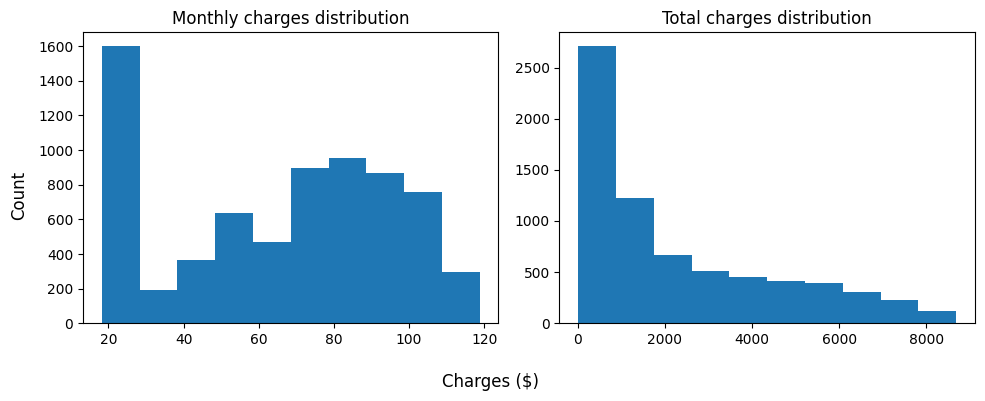

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))  # 1 row, 2 columns

# Plot data on the first subplot: Monthly charges
axs[0].hist(df_final['MonthlyCharges'])
axs[0].set_title('Monthly charges distribution')

# Plot data on the second subplot: Total charges
axs[1].hist(df_final['TotalCharges'])
axs[1].set_title('Total charges distribution')
fig.supxlabel('Charges ($)')
fig.supylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

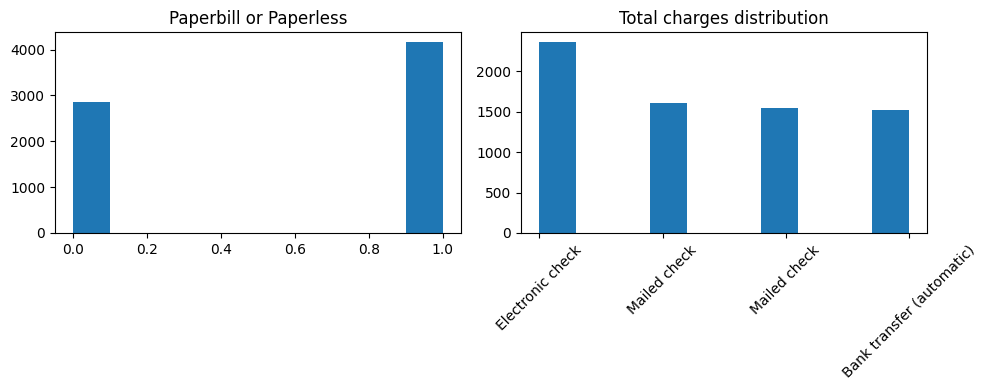

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))  # 1 row, 2 columns

# Plot data on the first subplot: Monthly charges
axs[0].hist(df_final['PaperlessBilling'])
axs[0].set_title('Paperbill or Paperless')

# Plot data on the second subplot: Total charges
axs[1].hist(df_final['PaymentMethod'])
axs[1].set_xticklabels(df_final['PaymentMethod'], rotation=45)
axs[1].set_title('Total charges distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

* What additional services (e.g., antivirus, technical support) are most commonly subscribed to by the customers?

In [ ]:
# Create subset dataframe for internet features
df_inet_features = df_final[['OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

# Create individual histograms with Plotly Express
fig1 = px.bar(df_personal['SeniorCitizen'].value_counts(), title='Senior citizen distribution')
fig2 = px.bar(df_personal['gender'].value_counts(), title='Gender distribution')
fig3 = px.bar(df_contract['Type'].value_counts(), title='Contract type distribution')
fig4 = px.bar(df_internet.groupby('InternetService').agg('count')['customerID'], title='Internet service type distribution')
fig5 = px.bar(df_inet_features.astype('int').sum().sort_values(ascending=False), title='Internet features distribution')

# Create subplots
fig = make_subplots(rows=3, cols=2, specs=[[{}, {}], [{}, {}], [{"colspan": 2}, None]], subplot_titles=('Senior citizen', 'Gender',
                                    'Contract type', 'Internet service type distribution',
                                    'Internet features distribution'))

# Add histograms to subplots
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=2, col=1)
fig.add_trace(fig4['data'][0], row=2, col=2)
fig.add_trace(fig5['data'][0], row=3, col=1)
fig.update_xaxes(range=[0,1], row=1, col=1)

# Update layout
fig.update_layout(title='Distribution', showlegend=False)

# Display the subplots
fig.show()

* Monthly charges distribution has 2 peaks. One is very high for 20-30\$/month and the other one at about 80\$/month
* Total charges distribution has positive skewness. It has very high distribution for low cost. The higher the cost, the distribution is lower

In [ ]:
list_category = ['PaperlessBilling', 'SeniorCitizen', 'Partner', 'Dependents',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Churn']
df1 = df_final.copy()
df1[list_category] = df1[list_category].astype(int)

In [ ]:
df1.SeniorCitizen.value_counts(dropna=False)

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   customerID        7032 non-null   object         
 1   Type              7032 non-null   category       
 2   PaperlessBilling  7032 non-null   int64          
 3   PaymentMethod     7032 non-null   category       
 4   MonthlyCharges    7032 non-null   float64        
 5   TotalCharges      7032 non-null   float64        
 6   gender            7032 non-null   object         
 7   SeniorCitizen     7032 non-null   int64          
 8   Partner           7032 non-null   int64          
 9   Dependents        7032 non-null   int64          
 10  InternetService   5512 non-null   object         
 11  OnlineSecurity    7032 non-null   int64          
 12  OnlineBackup      7032 non-null   int64          
 13  DeviceProtection  7032 non-null   int64          
 14  TechSupp

## Corellation map

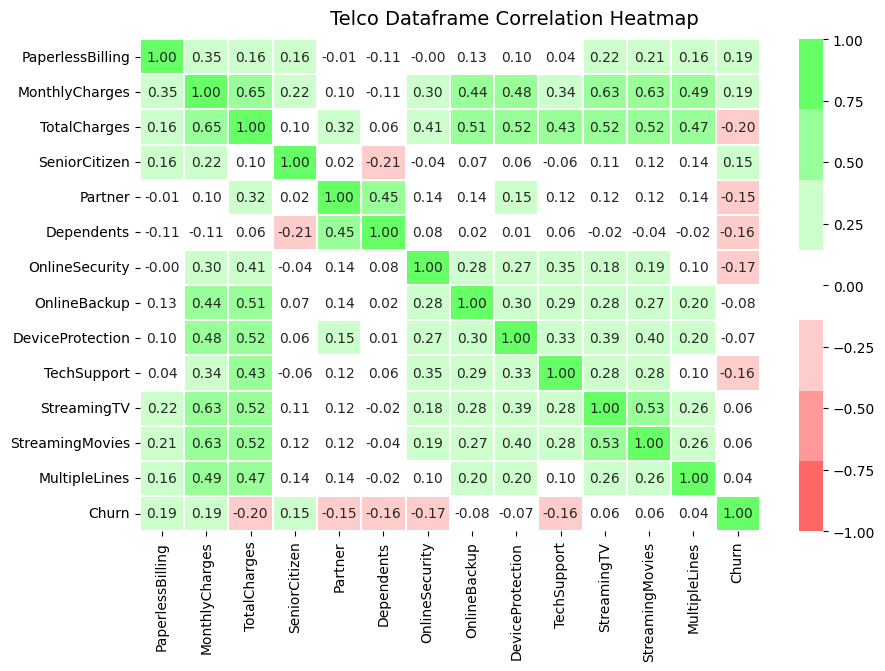

In [ ]:
# Correlation Matrix Heatmap
fig, ax = plt.subplots(figsize=(10, 6))
corr = df1.corr()
colors = ['#ff6666', '#ff9999', '#ffcccc', '#ffffff', '#ccffcc', '#99ff99', '#66ff66']
cmap = sns.color_palette(colors)
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap=cmap,fmt='.2f',
                 linewidths=.05, vmin=-1, vmax=1)
fig.subplots_adjust(top=0.93)
t= fig.suptitle('Telco Dataframe Correlation Heatmap', fontsize=14)

**Insights for EDA:**
* Senior vs non-senior citizen is 1:6. Notes: Senior citizen is an older adult and especially one who is age 65 or older
* Number of female and male clients is roughly same
* The most highest contract type is month-to-month type followed by two year and one year contract type. Month-to-month type is more than 2x times of two year/one year contract type
* There are more clients who have fiber optic service than those who have DSL (3 vs 2.5)
* Top 3 internet service features are Streaming movies, Streaming TV, and Online backup
* Top most positive parameter that corellate with higher Charges are internet features (Straming movies, TV) and phone service (multiple line)

# Model

## Import required plugin/library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import time

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

## One hot encoder and a bit data cleaning

In [ ]:
df1['ContractDuration'] = df1['ContractDuration'].dt.days

In [ ]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df1[['Type','PaymentMethod','gender','InternetService']], prefix='cat')

# Concatenate one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df1, one_hot_encoded], axis=1)
column_label = ['customerID','Type','PaymentMethod','gender','InternetService']
df_encoded = df_encoded.drop(column_label, axis=1)

df_encoded.head(3)

,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,cat_One year,cat_Two year,cat_Bank transfer (automatic),cat_Credit card (automatic),cat_Electronic check,cat_Mailed check,cat_Female,cat_Male,cat_DSL,cat_Fiber optic
0,1,29.85,29.85,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,56.95,1889.50,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,1,0
2,1,53.85,108.15,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,1,0


# Define features, target, scaling & balancing

In [ ]:
X = df_encoded.drop(['Churn', 'ContractDuration'], axis=1).reset_index(drop=True)
y = df_encoded['Churn'].reset_index(drop=True)

In [ ]:
def scaler(x_data, scaler='standard'):
  if scaler == 'standard':
    scaler = StandardScaler()
  else:
    scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(x_data)

  return X_scaled

X_scaled = scaler(X)

In [ ]:
def balancing(x, y):
  # Create SMOTE object
  smote = SMOTE()

  # Fit and apply the SMOTE transformation to the training data
  X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

  return X_resampled, y_resampled

X_resampled, y_resampled = balancing(X_scaled, y)

## Model split test and train datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8260, 24)
(2066, 24)
(8260,)
(2066,)


## Simple basic modeling

Method that will be used:
*   Logistic regression (default)
*   Random forest classifer (default)
*   Decision tree classifier (default)

Random state: "1234" will also be used for reproducibility reason


In [ ]:
# Create a function for evaluating score metrics
def evaluate_score(y_test, y_pred, y_pred_proba, modelname='N/A'):
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Calculate precision
  precision = precision_score(y_test, y_pred)
  print("Precision:", precision)

  # Calculate recall
  recall = recall_score(y_test, y_pred)
  print("Recall:", recall)

  # Calculate F1-score
  f1 = f1_score(y_test, y_pred)
  print("F1-score:", f1)

  # Calculate ROC AUC score
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  print("ROC AUC score:", roc_auc)

  # Calculate ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  # Confusion matrix & plot
  cm = confusion_matrix(y_test, y_pred)

  # Create plot
  fig, axs = plt.subplots(1,2, figsize=(10,4))  # Create 2 rows of subplots

  # Plot on the first subplot (index 0)
  fig.suptitle(f'Model name: {modelname}')
  axs[0].plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
  axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
  axs[0].set_xlabel('False Positive Rate')
  axs[0].set_ylabel('True Positive Rate')
  axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
  axs[0].legend()
  axs[0].grid(True)

  # Plot on the second subplot (index 1)
  axs[1].imshow(cm)
  axs[1].grid(False)
  axs[1].set_title('Confusion matrix')
  axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
  axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
  axs[1].set_ylim(1.5, -0.5)
  for i in range(2):
      for j in range(2):
          axs[1].text(j, i, cm[i, j], ha='center', va='center', color='red')
  plt.show()

Accuracy: 0.7599225556631172
Precision: 0.731549815498155
Recall: 0.7945891783567134
F1-score: 0.7617675312199808
ROC AUC score: 0.8418850810234701


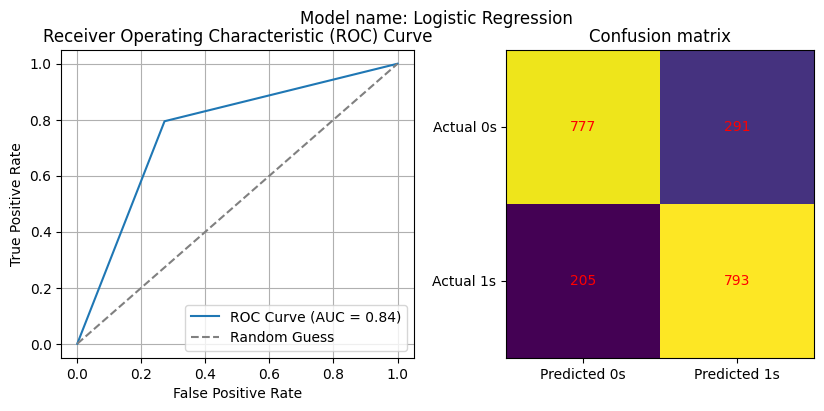

Accuracy: 0.8436592449177154
Precision: 0.8299120234604106
Recall: 0.8507014028056112
F1-score: 0.8401781296387928
ROC AUC score: 0.9209552062927353


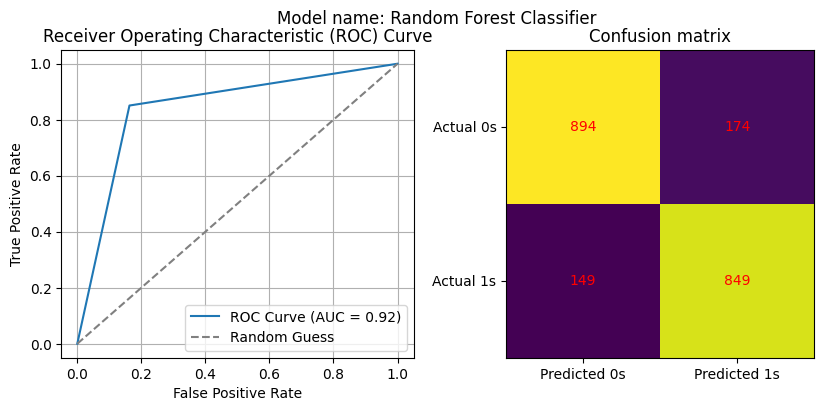

Accuracy: 0.7802516940948693
Precision: 0.7698412698412699
Recall: 0.7775551102204409
F1-score: 0.7736789631106681
ROC AUC score: 0.7797373773764757


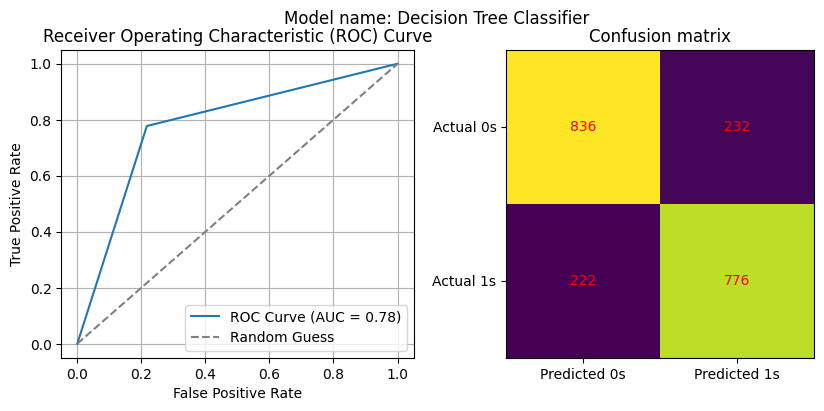

In [ ]:
model_label = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier']
rs = 1234
model = [LogisticRegression(random_state=rs), RandomForestClassifier(random_state=rs), DecisionTreeClassifier(random_state=rs)]

for model, model_name in list(zip(model, model_label)):
# model = LogisticRegression(random_state=1234)
# model = RandomForestClassifier(random_state=1234)
  model = model
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:,1]
  evaluate_score(y_test, y_pred, y_pred_proba, model_name)

## Insights
*   When default values is used, random forest classifier shows the best quality
*   ROC is above 0.9 when Random forest is used, followed by Logistic regression and Decision tree classifier
*   Computation time for both three models are almost the same


## Hyperparameter tuning

*   XGBoost will be used
*   Hyperparameter tuning : adjusting learning rate from 0.3 - 0.001



Accuracy: 0.8359148112294289
Precision: 0.8227228207639569
Recall: 0.8416833667334669
F1-score: 0.8320950965824664
ROC AUC score: 0.832746485480324


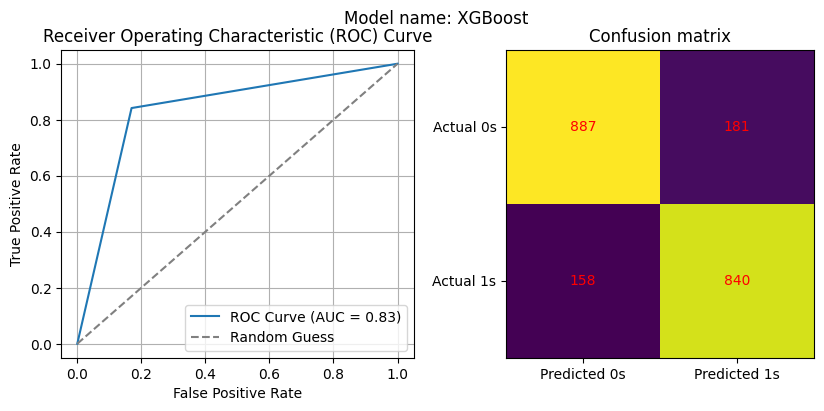

Accuracy: 0.8359148112294289
Precision: 0.8227228207639569
Recall: 0.8416833667334669
F1-score: 0.8320950965824664
ROC AUC score: 0.8426046850254817


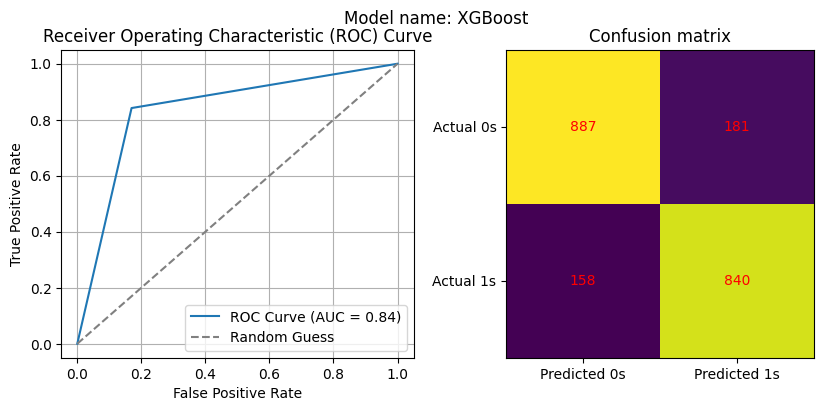

Accuracy: 0.8359148112294289
Precision: 0.8227228207639569
Recall: 0.8416833667334669
F1-score: 0.8320950965824664
ROC AUC score: 0.8916522182942663


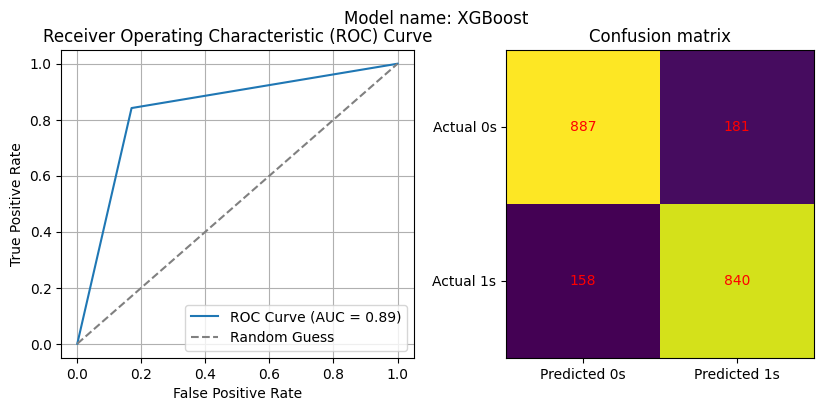

Accuracy: 0.8359148112294289
Precision: 0.8227228207639569
Recall: 0.8416833667334669
F1-score: 0.8320950965824664
ROC AUC score: 0.9138107676026209


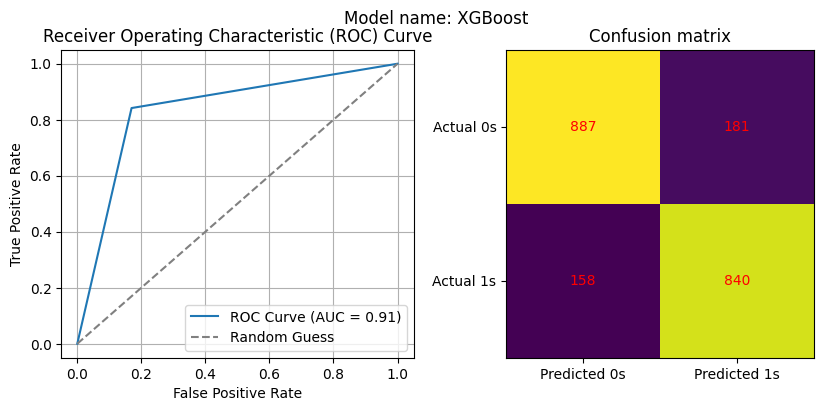

Accuracy: 0.8359148112294289
Precision: 0.8227228207639569
Recall: 0.8416833667334669
F1-score: 0.8320950965824664
ROC AUC score: 0.9224811983517598


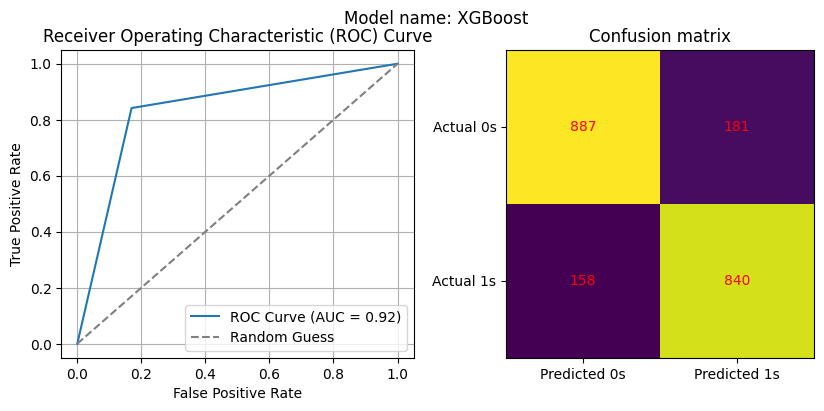

Accuracy: 0.8359148112294289
Precision: 0.8227228207639569
Recall: 0.8416833667334669
F1-score: 0.8320950965824664
ROC AUC score: 0.9234710056817755


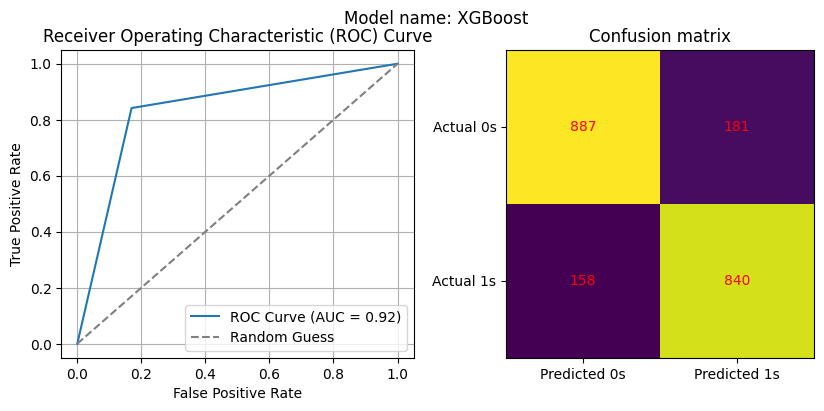

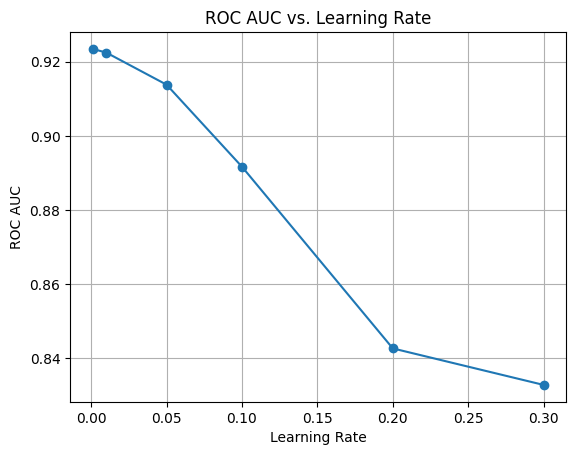

Elapsed time: 8.3484468460083 seconds


In [ ]:
start_time = time.time()

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# num_rounds = 1000

# xgb_model = xgb.train(params, dtrain, num_rounds)
# predictions = xgb_model.predict(dtest)
# y_pred = (predictions > 0.5).astype(int)

learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]

# Train XGBoost models with different learning rates and calculate ROC AUC scores
roc_auc_scores = []
for lr in learning_rates:
  params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta': lr,
        'max_depth': 3,
        'min_child_weight': 1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'gamma': 0,
        'lambda': 1,
        'alpha': 0,
        'n_estimators': 100
    }
  xgb_model = xgb.XGBClassifier(**params)
  xgb_model.fit(X_train, y_train)
  y_pred = xgb_model.predict(X_test)
  y_pred = (predictions > 0.5).astype(int)
  y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
  evaluate_score(y_test, y_pred, y_pred_proba, 'XGBoost')
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  roc_auc_scores.append(roc_auc)

# # Plot ROC AUC curve
plt.figure()
plt.plot(learning_rates, roc_auc_scores[::-1], marker='o')
plt.title('ROC AUC vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('ROC AUC')
plt.grid(True)
plt.show()

end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

* XGBoost with hyperparameter tuning shows also similar result with Random forest classifier model
* AUC score is about 0.92

# Conclusion

<ol>
  <li>  EDA (Explanatory Data Analysis), dataset merging, data cleaning, and feature engineering have already been conducted. Results are as follows:</li>

  <ul>
    <li> The ratio of senior citizens to non-senior citizens is found to be 1:6.
    The number of female and male clients is roughly the same.</li>
    <li>The most common contract type is month-to-month, followed by two-year and one-year contract types. Month-to-month contracts outnumber two-year/one-year contracts by more than 2x.</li>
    <li>There are more clients with fiber optic service than those with DSL (3 vs 2.5).</li>
    <li>Several models have also been developed, including random forest, decision tree, logistic regression, and XGBoost with hyperparameter tuning.</li>
  </ul>

  <li> The best model for predicting churn based on several features (e.g., total charges, internet and phone services) is XGBoost with hyperparameter tuning and the Random Forest classifier model.</li>

  <li> The AUC score is above 0.9, which exceeds expectations.
  By predicting churn, the internal team, especially the marketing team, can take proactive measures to retain their clients.</li>
</ol>
